[Big Sales Data](https://www.kaggle.com/datasets/pigment/big-sales-data)

dependency: [pandas-categorical](https://pypi.org/project/pandas-categorical/)
```
pip install pandas-categorical
```


In [1]:
import numpy as np
import pandas as pd
import pandas_categorical as pdc


In [2]:
# optimal column types
SUB_DTYPES = {
    'Invoice/Item Number': "string",
    'Date': 'datetime64[ns]',
    'Store Number': "uint16",
    'Store Name': "string",
    'Address': 'string',
    'City': "string",
    'Zip Code': 'string',
    'Store Location': 'string',
    'County Number': "Int16",
    'County': "string",
    'Category': "Int32",
    'Category Name': 'string',
    'Vendor Number': "Int16",
    'Vendor Name': 'string',
    'Item Number': "string",
    'Item Description': "string",
    'Pack': "uint16",
    'Bottle Volume (ml)': "uint32",
    'State Bottle Cost': float,
    'State Bottle Retail': float,
    'Bottles Sold': int,
    'Sale (Dollars)': float,
    'Volume Sold (Liters)': float,
    'Volume Sold (Gallons)': float,
}

In [3]:
df = pd.read_csv(
    "data/raw/Liquor_Sales.csv",
    engine='pyarrow',
    dtype=SUB_DTYPES
    #nrows=1000
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19666763 entries, 0 to 19666762
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice/Item Number    string        
 1   Date                   datetime64[ns]
 2   Store Number           uint16        
 3   Store Name             string        
 4   Address                string        
 5   City                   string        
 6   Zip Code               string        
 7   Store Location         string        
 8   County Number          Int16         
 9   County                 string        
 10  Category               Int32         
 11  Category Name          string        
 12  Vendor Number          Int16         
 13  Vendor Name            string        
 14  Item Number            string        
 15  Item Description       string        
 16  Pack                   uint16        
 17  Bottle Volume (ml)     uint32        
 18  State Bottle Cost   

In [4]:
# Let's put a small part of the data aside
(_, df), (_, df_1) = df.groupby(df.index < 1000)

In [4]:
CAT_COLS = [
    'Date',
    'Store Number',
    'Store Name',
    'Address',
    'City',
    'Zip Code',
    'Store Location',
    'County Number',
    'County',
    'Category',
    'Category Name',
    'Vendor Number',
    'Vendor Name',
    'Item Number',
    'Item Description',
    'Pack',
    'Bottle Volume (ml)',
]
ORDERED_COLS = [
    'Date',
    'Bottle Volume (ml)',
]

pdc.cat_astype(df, cat_cols=CAT_COLS, sub_dtypes=SUB_DTYPES, ordered_cols=ORDERED_COLS)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19666763 entries, 0 to 19666762
Data columns (total 24 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   Invoice/Item Number    string  
 1   Date                   category
 2   Store Number           category
 3   Store Name             category
 4   Address                category
 5   City                   category
 6   Zip Code               category
 7   Store Location         category
 8   County Number          category
 9   County                 category
 10  Category               category
 11  Category Name          category
 12  Vendor Number          category
 13  Vendor Name            category
 14  Item Number            category
 15  Item Description       category
 16  Pack                   category
 17  Bottle Volume (ml)     category
 18  State Bottle Cost      float64 
 19  State Bottle Retail    float64 
 20  Bottles Sold           int64   
 21  Sale (Dollars)         float6

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Invoice/Item Number    1000 non-null   string        
 1   Date                   1000 non-null   datetime64[ns]
 2   Store Number           1000 non-null   uint16        
 3   Store Name             1000 non-null   string        
 4   Address                1000 non-null   string        
 5   City                   1000 non-null   string        
 6   Zip Code               1000 non-null   string        
 7   Store Location         1000 non-null   string        
 8   County Number          1000 non-null   Int16         
 9   County                 1000 non-null   string        
 10  Category               1000 non-null   Int32         
 11  Category Name          1000 non-null   string        
 12  Vendor Number          1000 non-null   Int16         
 13  Vendor Na

array([[<Axes: title={'center': 'count'}>]], dtype=object)

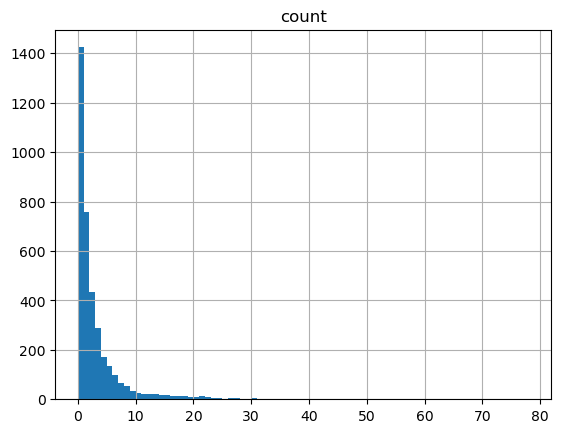

In [7]:
df_small = df.sample(n=10000)

address_counts = pd.value_counts(df_small.Address).to_frame().reset_index()
max_orders = address_counts['count'].max() # or df.loc[df['count'].idxmax()]
address_counts.hist(bins=max_orders)

In [9]:
pd.value_counts(df.Address).to_frame().reset_index()


,Address,count
0,1460 2ND AVE,131882
1,3221 SE 14th St,118450
2,3221 SE 14TH ST,110527
3,,79927
4,1501 Michigan Ave,75677
...,...,...
3710,4860 Heatherstone Rd.,2
3711,"3576, Dolphin Dr",2
3712,1685 W Uintah St. #101,2
3713,"29538, 210th St.",1


In [11]:
from sales_util import read_liquor_csv, infer_relation_cardinalities
infer_relation_cardinalities(df)

,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml)
Date,0,417,415,417,157,172,385,69,79,77,70,94,94,1788,1323,16,25
Store Number,1814,0,4,5,4,3,4,2,4,99,127,218,309,4092,4010,19,37
Store Name,1814,3,0,6,5,3,3,2,4,99,127,218,309,4092,4010,19,37
Address,1800,121,121,0,3,2,3,2,5,98,126,214,308,4087,4005,19,34
City,1166,120,120,110,0,13,91,3,5,96,125,222,316,5165,4896,21,38
Zip Code,2044,121,121,68,7,0,41,3,6,102,129,236,335,5555,5392,24,42
Store Location,2057,292,319,281,168,122,0,62,106,100,128,221,309,5903,5607,20,49
County Number,2095,326,351,500,31,31,262,0,3,105,131,283,407,7816,7064,25,50
County,1955,255,274,413,132,97,225,1,0,101,127,227,315,6397,5571,25,44
Category,2092,2445,2599,3674,833,489,1961,99,202,0,2,96,126,881,845,15,34


In [5]:
df.apply(pd.Series.nunique)

Invoice/Item Number      19666763
Date                         2133
Store Number                 2484
Store Name                   2634
Address                      3715
City                          837
Zip Code                      491
Store Location               1989
County Number                  99
County                        202
Category                      110
Category Name                 134
Vendor Number                 348
Vendor Name                   486
Item Number                  9700
Item Description             8706
Pack                           27
Bottle Volume (ml)             56
State Bottle Cost            3050
State Bottle Retail          3515
Bottles Sold                  582
Sale (Dollars)              28404
Volume Sold (Liters)         1332
Volume Sold (Gallons)        1578
dtype: int64

In [6]:
date_min = df['Date'].min()
date_max = df['Date'].max()
print("Sales from", date_min, "to", date_max, ".")

Sales from  2012-01-03 00:00:00  to  2020-09-30 00:00:00 .


In [7]:
profit = df['State Bottle Retail'] - df['State Bottle Cost']
profit.describe()

count    1.966675e+07
mean     4.981393e+00
std      5.374484e+00
min     -1.681000e+01
25%      2.750000e+00
50%      4.120000e+00
75%      6.030000e+00
max      3.840000e+03
dtype: float64

In [8]:
profit.apply(lambda x: x >= 0).value_counts()

True     19666712
False          51
Name: count, dtype: int64